In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.utils import to_categorical
import koreanize_matplotlib
from konlpy.tag import Mecab

2024-09-14 13:08:07.609215: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-14 13:08:07.619426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-14 13:08:07.629451: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-14 13:08:07.632657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-14 13:08:07.640896: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/haram4th/data4mdai/main/hotelscom_review_train.csv")
test_data = pd.read_csv("../06machine_learning/data/hotelscom_review_test.csv")

In [3]:
train_data.head()

,description,isgood
0,사람이 너무 많고 작은 수영장과 조식 수용한계로 모두 포기하고 옆의 아이파크몰에서 ...,0
1,방도크고 깨끗하여 아주 좋았어요,1
2,매년여름휴가철마다 찾는곳이예요 너무 좋아요 점점 더 좋아지는듯 직원분들도 너무 친절...,1
3,여수에서는 제일 유명한 호텔이래요 호텔 stay 가 필요하다면 소노캄 여수도 괜찮은...,1
4,가격대비 훌륭하지만 아무래도 오래된 느낌이 많이 드네요겉이불은 세탁하니까 깨끗히나 ...,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53964 entries, 0 to 53963
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  53964 non-null  object
 1   isgood       53964 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 843.3+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35977 entries, 0 to 35976
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  35977 non-null  object
 1   isgood       35977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 562.3+ KB


# 토큰화

In [6]:
docs = train_data['description']

In [7]:
mecab = Mecab()
mecab.morphs(docs[0])

['사람',
 '이',
 '너무',
 '많',
 '고',
 '작',
 '은',
 '수영장',
 '과',
 '조식',
 '수용',
 '한계',
 '로',
 '모두',
 '포기',
 '하',
 '고',
 '옆',
 '의',
 '아이파크몰',
 '에서',
 '그냥',
 '식사',
 '함']

In [8]:
type(docs)

pandas.core.series.Series

In [9]:
%%time
# 전체 문장을 토큰화 후 tokenized_docs에 저장
tokenized_docs = docs.apply(mecab.morphs)

CPU times: user 4.89 s, sys: 39.6 ms, total: 4.93 s
Wall time: 5 s


In [10]:
# import joblib
# joblib.dump(tokenized_docs, "./model/hotels_tokenized_docs")

In [11]:
# tokenized_docs = joblib.load("./model/hotels_tokenized_docs")

In [12]:
# tokenized_docs[0]

In [13]:
# 단어 인덱스 생성
token = Tokenizer(lower=False)
token.fit_on_texts(tokenized_docs)
print(len(token.word_index))

30149


In [14]:
# 문장 백터화 
X = token.texts_to_sequences(tokenized_docs)
print(X[0])

[200, 1, 30, 81, 2, 146, 10, 168, 56, 51, 3466, 3762, 47, 167, 1858, 3, 2, 231, 32, 3068, 27, 205, 221, 71]


In [15]:
y = train_data['isgood']
y

0        0
1        1
2        1
3        1
4        1
        ..
53959    1
53960    1
53961    1
53962    1
53963    1
Name: isgood, Length: 53964, dtype: int64

In [16]:
# 가장 긴 문장의 길이 구하기
max_len = max(len(i) for i in X)
print("가장 긴 문장의 길이(패딩에 사용): ", max_len)

가장 긴 문장의 길이(패딩에 사용):  738


In [17]:
# 패딩
X_padded = pad_sequences(X, maxlen=max_len, padding='post')
print(X_padded[0])

[ 200    1   30   81    2  146   10  168   56   51 3466 3762   47  167
 1858    3    2  231   32 3068   27  205  221   71    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [18]:
# 홀드아웃
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X_padded, y, test_size=0.3 ,stratify=y, random_state=10)

In [20]:
# 임베딩에 입력될 단어 수
word_size = len(token.word_index) + 1 
print(word_size)

30150


# 양방향 RNN 네트워크를 이용해 텍스트 분석

In [21]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [33]:
birnn = Sequential()
birnn.add(Embedding(input_dim=word_size, output_dim=64))
birnn.add(Bidirectional(SimpleRNN(128, return_sequences=True, activation='tanh')))
birnn.add(Dropout(0.5))
birnn.add(SimpleRNN(64, activation='tanh'))
birnn.add(Dropout(0.5))
birnn.add(Dense(32, activation='relu'))
birnn.add(Dense(1, activation='sigmoid'))
# 모델 요약
birnn.build(input_shape=(None, max_len))  # 입력 형태 지정
birnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 738, 64)        │     1,929,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 738, 256)       │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 738, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 64)             │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,001,665 (7.64 MB)

 Trainable params: 2,001,665 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
birnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelpath = "./model/hotels_review_birnn.keras"
checkpoint = ModelCheckpoint(filepath=modelpath, save_best_only=True)
earlystop = EarlyStopping(patience=50)

In [37]:
birnn_history = birnn.fit(X_train, y_train, epochs=1000, batch_size=512,
                          validation_data=(X_valid, y_valid),
                          callbacks=[earlystop, checkpoint])

Epoch 1/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 505ms/step - accuracy: 0.7803 - loss: 0.5295 - val_accuracy: 0.7812 - val_loss: 0.5264
Epoch 2/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 39s 530ms/step - accuracy: 0.7795 - loss: 0.5294 - val_accuracy: 0.7812 - val_loss: 0.5267
Epoch 3/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 36s 480ms/step - accuracy: 0.7839 - loss: 0.5238 - val_accuracy: 0.7812 - val_loss: 0.5266
Epoch 4/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 37s 504ms/step - accuracy: 0.7828 - loss: 0.5253 - val_accuracy: 0.7812 - val_loss: 0.5298
Epoch 5/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 35s 470ms/step - accuracy: 0.7804 - loss: 0.5288 - val_accuracy: 0.7812 - val_loss: 0.5270
Epoch 6/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 34s 462ms/step - accuracy: 0.7839 - loss: 0.5235 - val_accuracy: 0.7812 - val_loss: 0.5266
Epoch 7/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 34s 460ms/step - accuracy: 0.7827 - loss: 0.5247 - val_accuracy: 0.7812 - val_loss: 0.5276
Epoch 8/1000
74/74 ━━━━━━━━━━━━━━━━━━━━ 37s 501ms/step - accuracy: 0.7804 - loss: 0

KeyboardInterrupt: 

In [36]:
def result_plot(x):
    # 검증셋과 학습셋의 오차를 저장합니다.
    y_vloss = x.history['val_loss']
    y_loss = x.history['loss']

    # 그래프로 표현해 봅니다.
    x_len = np.arange(len(y_loss))
    plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
    plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

    # 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

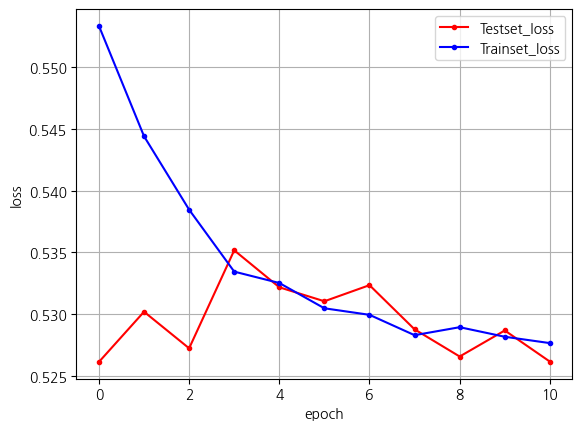

In [40]:
result_plot(birnn_history)

# LSTM과 CNN 조합 모델로 분석

In [22]:
from tensorflow.keras.layers import Dropout, Activation, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Activation, Bidirectional

In [23]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(input_dim=word_size, output_dim=64))  # 임베딩 벡터의 차원을 64로 증가
model.add(Dropout(0.5))  # Dropout 층 추가
model.add(Conv1D(128, 5, padding='valid', activation='relu', strides=1))  # Conv1D 층 추가
model.add(MaxPooling1D(pool_size=4))  # MaxPooling 층 추가
model.add(Conv1D(128, 5, padding='valid', activation='relu', strides=1))  # 추가적인 Conv1D 층
model.add(MaxPooling1D(pool_size=4))  # MaxPooling 층 추가
model.add(Bidirectional(LSTM(256, return_sequences=True, activation='tanh')))  # 양방향 LSTM 층 추가
model.add(Dropout(0.5))  # Dropout 층 추가
model.add(LSTM(128, activation='tanh'))  # 추가적인 LSTM 층
model.add(Dropout(0.5))  # Dropout 층 추가
model.add(Dense(64, activation='relu'))  # Dense 층 추가
model.add(Dense(32, activation='relu'))  # 추가적인 Dense 층
model.add(Dense(1, activation='sigmoid'))  # 출력층
# 모델 요약
model.build(input_shape=(None, max_len))  # 입력 형태 지정
model.summary()

I0000 00:00:1726319354.370901     243 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726319354.381197     243 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726319354.381234     243 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726319354.383858     243 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726319354.384325     243 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 738, 64)        │     1,929,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 738, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 734, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 183, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 179, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 44, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 44, 512)        │       788,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 44, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,179,777 (12.13 MB)

 Trainable params: 3,179,777 (12.13 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelpath = "./model/hotels_review_LSTM_CNN.keras"
checkpoint = ModelCheckpoint(filepath=modelpath, save_best_only=True)
earlystop = EarlyStopping(patience=50)

In [27]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=128,
                          validation_data=(X_valid, y_valid),
                          callbacks=[earlystop, checkpoint])

Epoch 1/1000


W0000 00:00:1726319753.756806     340 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319753.769036     340 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319753.780441     340 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319753.792057     340 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319753.803417     340 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319753.815754     340 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319753.828024     340 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319753.838699     340 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319753.852320     340 gp

W0000 00:00:1726319754.165288     338 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319754.167221     338 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319754.169304     338 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319754.171172     338 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319754.173754     338 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319754.175818     338 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319754.177895     338 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319754.179574     338 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319754.181338     338 gp

  5/296 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7806 - loss: 0.5263 

W0000 00:00:1726319754.366004     338 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319754.368919     338 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319754.371953     338 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced


295/296 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7815 - loss: 0.5259

W0000 00:00:1726319764.346983     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.348191     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.349161     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.350290     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.351583     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.352473     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.353370     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.354281     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.355268     341 gp

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7815 - loss: 0.5259

W0000 00:00:1726319764.552538     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.554006     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.555114     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.556454     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.557780     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.558879     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.559929     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.561177     341 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319764.562492     341 gp

296/296 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7815 - loss: 0.5259 - val_accuracy: 0.7812 - val_loss: 0.5261
Epoch 2/1000
  1/296 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.7891 - loss: 0.5144

W0000 00:00:1726319766.102486     335 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319766.103838     335 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319766.105452     335 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319766.106903     335 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319766.108077     335 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319766.109277     335 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319766.110512     335 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319766.111789     335 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1726319766.113052     335 gp

296/296 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.7809 - loss: 0.5267 - val_accuracy: 0.7812 - val_loss: 0.5281
Epoch 3/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.7794 - loss: 0.5292 - val_accuracy: 0.7812 - val_loss: 0.5257
Epoch 4/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.7818 - loss: 0.5256 - val_accuracy: 0.7812 - val_loss: 0.5279
Epoch 5/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.7832 - loss: 0.5240 - val_accuracy: 0.7812 - val_loss: 0.5257
Epoch 6/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.7808 - loss: 0.5267 - val_accuracy: 0.7812 - val_loss: 0.5261
Epoch 7/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.7820 - loss: 0.5250 - val_accuracy: 0.7812 - val_loss: 0.5268
Epoch 8/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.7798 - loss: 0.5276 - val_accuracy: 0.7812 - val_loss: 0.5255
Epoch 9/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.7785 - loss: 0.5293

In [28]:
# !pip install attention

In [29]:
from attention import Attention

ModuleNotFoundError: No module named 'attention'

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Input, Flatten, GlobalAveragePooling1D
from tensorflow.keras.layers import Attention
from tensorflow.keras.models import Model

# 입력 레이어
inputs = Input(shape=(max_len,))

# 임베딩 레이어
x = Embedding(input_dim=word_size, output_dim=64)(inputs)
x = Dropout(0.5)(x)

# 양방향 LSTM과 Attention
x = Bidirectional(LSTM(128, return_sequences=True))(x)
attention = Attention()([x, x])
x = Dropout(0.5)(attention)

# 추가적인 LSTM과 Attention
x = LSTM(64, return_sequences=True)(x)
attention = Attention()([x, x])
x = Dropout(0.5)(attention)

# 차원 축소
x = GlobalAveragePooling1D()(x)

# Dense 레이어
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# 출력 레이어
outputs = Dense(1, activation='sigmoid')(x)

# 모델 정의
model = Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 738)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 738, 64)   │  1,929,600 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 738, 64)   │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 738, 256)  │    197,632 │ dropout_3[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 738, 256)  │          0 │ bidirectional_1[… │
│ (Attention)         │                   │            │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 738, 256)  │          0 │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 738, 64)   │     82,176 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 738, 64)   │          0 │ lstm_3[0][0],     │
│ (Attention)         │                   │            │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 738, 64)   │          0 │ attention_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ dropout_5[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │     16,640 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      2,080 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         33 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,269,313 (8.66 MB)

 Trainable params: 2,269,313 (8.66 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelpath = "./model/hotels_review_Attention.keras"
checkpoint = ModelCheckpoint(filepath=modelpath, save_best_only=True)
earlystop = EarlyStopping(patience=50)

In [32]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=128,
                          validation_data=(X_valid, y_valid),
                          callbacks=[earlystop, checkpoint])

Epoch 1/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 75s 245ms/step - accuracy: 0.7829 - loss: 0.5255 - val_accuracy: 0.7372 - val_loss: 0.4936
Epoch 2/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 81s 242ms/step - accuracy: 0.8041 - loss: 0.4296 - val_accuracy: 0.8477 - val_loss: 0.3683
Epoch 3/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 71s 240ms/step - accuracy: 0.8632 - loss: 0.3318 - val_accuracy: 0.8728 - val_loss: 0.3166
Epoch 4/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 71s 240ms/step - accuracy: 0.8775 - loss: 0.2960 - val_accuracy: 0.8734 - val_loss: 0.3039
Epoch 5/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 73s 247ms/step - accuracy: 0.8993 - loss: 0.2564 - val_accuracy: 0.8798 - val_loss: 0.2973
Epoch 6/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 81s 273ms/step - accuracy: 0.9066 - loss: 0.2404 - val_accuracy: 0.8805 - val_loss: 0.2879
Epoch 7/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 70s 237ms/step - accuracy: 0.9174 - loss: 0.2207 - val_accuracy: 0.8805 - val_loss: 0.2987
Epoch 8/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 71s 239ms/step - accuracy: 

KeyboardInterrupt: 

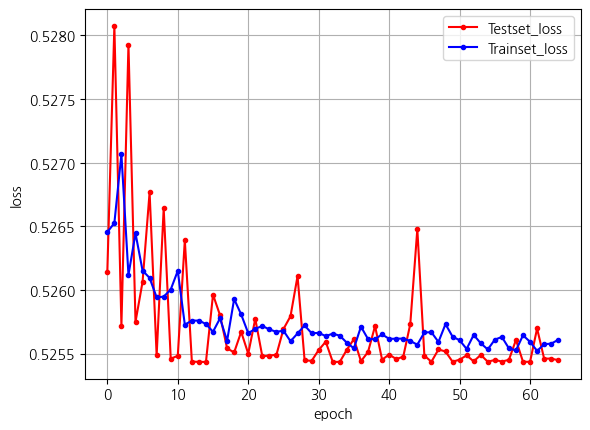

In [37]:
result_plot(history)

# 머신러닝 나이브 베이즈와 비교를 위해 비교 분석

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [31]:
def tokenizer(x):
    token = mecab.morphs(x)
    return token

In [32]:
X = train_data['description']
y = train_data['isgood']

In [34]:
tfidf_cv = TfidfVectorizer(tokenizer=tokenizer, max_df=0.8, min_df=4, ngram_range=(1,3))
X_tfidf = tfidf_cv.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X_tfidf, y, test_size=0.4, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=7)

In [36]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred = mnb.predict(X_valid)
print(classification_report(y_valid, pred))
test_pred = mnb.predict(X_test)
print("="*40, "test result", "="*40)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.93      0.31      0.47      2321
           1       0.84      0.99      0.91      8472

    accuracy                           0.85     10793
   macro avg       0.88      0.65      0.69     10793
weighted avg       0.86      0.85      0.82     10793

======================================== test result ========================================
              precision    recall  f1-score   support

           0       0.93      0.29      0.45      2327
           1       0.84      0.99      0.91      8466

    accuracy                           0.84     10793
   macro avg       0.88      0.64      0.68     10793
weighted avg       0.86      0.84      0.81     10793



# 

In [41]:
import joblib
joblib.dump(mecab, "./model/mecab_hotels_model")
joblib.dump(mnb, "./model/Naive Bayes_hotels_model")
joblib.dump(tfidf_cv, "./model/tfidf_cv_hotels_model")

['./model/tfidf_cv_hotels_model']